<a href="https://colab.research.google.com/github/khalidpark/Projects/blob/main/Section2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# 작업1)
### teams.csv 데이터에서 팀 ID 와 팀 약어 정보만 추출

In [ ]:
df_team = pd.read_csv('/content/teams.csv')

In [ ]:
df_team.columns

Index(['LEAGUE_ID', 'TEAM_ID', 'MIN_YEAR', 'MAX_YEAR', 'ABBREVIATION',
       'NICKNAME', 'YEARFOUNDED', 'CITY', 'ARENA', 'ARENACAPACITY', 'OWNER',
       'GENERALMANAGER', 'HEADCOACH', 'DLEAGUEAFFILIATION'],
      dtype='object')

In [ ]:
#팀 ID와 팀이름만 추출

df_team = df_team[['TEAM_ID', 'ABBREVIATION']]

In [ ]:
#총 30팀

df_team.head(30)

,TEAM_ID,ABBREVIATION
0,1610612737,ATL
1,1610612738,BOS
2,1610612740,NOP
3,1610612741,CHI
4,1610612742,DAL
5,1610612743,DEN
6,1610612745,HOU
7,1610612746,LAC
8,1610612747,LAL
9,1610612748,MIA




---



# 작업2)

In [ ]:
df = pd.read_csv('/content/games.csv')

In [ ]:
# 시계열데이터 datetime 타입으로 변경
df['GAME_DATE_EST'] =pd.to_datetime(df.GAME_DATE_EST)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23520 entries, 0 to 23519
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   GAME_DATE_EST     23520 non-null  datetime64[ns]
 1   GAME_ID           23520 non-null  int64         
 2   GAME_STATUS_TEXT  23520 non-null  object        
 3   HOME_TEAM_ID      23520 non-null  int64         
 4   VISITOR_TEAM_ID   23520 non-null  int64         
 5   SEASON            23520 non-null  int64         
 6   TEAM_ID_home      23520 non-null  int64         
 7   PTS_home          23421 non-null  float64       
 8   FG_PCT_home       23421 non-null  float64       
 9   FT_PCT_home       23421 non-null  float64       
 10  FG3_PCT_home      23421 non-null  float64       
 11  AST_home          23421 non-null  float64       
 12  REB_home          23421 non-null  float64       
 13  TEAM_ID_away      23520 non-null  int64         
 14  PTS_away          2342

In [ ]:
df = df.sort_values(by='GAME_DATE_EST')

In [ ]:
df = df.reset_index()

In [ ]:
del df['index']

In [ ]:
# 시간순서대로 정렬한뒤 , 인덱스 초기화

df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2003-10-05,10300001,Final,1610612762,1610612742,2003,1610612762,90.0,0.457,0.735,0.143,23.0,41.0,1610612742,85.0,0.447,0.500,0.250,20.0,38.0,1
1,2003-10-06,10300002,Final,1610612763,1610612749,2003,1610612763,105.0,0.494,0.618,0.267,25.0,48.0,1610612749,94.0,0.427,0.700,0.154,20.0,43.0,1
2,2003-10-07,10300009,Final,1610612758,1610612746,2003,1610612758,101.0,0.467,0.871,0.444,19.0,39.0,1610612746,82.0,0.368,0.609,0.364,13.0,50.0,1
3,2003-10-07,10300005,Final,1610612757,1610612745,2003,1610612757,104.0,0.527,0.657,0.429,22.0,33.0,1610612745,80.0,0.470,0.667,0.333,10.0,37.0,1
4,2003-10-07,10300007,Final,1610612748,1610612755,2003,1610612748,86.0,0.352,0.647,0.222,15.0,55.0,1610612755,79.0,0.329,0.897,0.143,7.0,44.0,1


In [ ]:
#필요한 특성값만 추출하기 위해 컬럼 확인

df.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [ ]:
df= df[['GAME_DATE_EST', 'SEASON', 'HOME_TEAM_ID','VISITOR_TEAM_ID','PTS_home', 'FG_PCT_home','FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away','PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS']]

In [ ]:
# TEAM ID 숫자를 약어로 변경
for i in range(0,30):
    df = df.replace(df_team['TEAM_ID'][i],df_team['ABBREVIATION'][i])

In [ ]:
df.head()

,GAME_DATE_EST,SEASON,HOME_TEAM_ID,VISITOR_TEAM_ID,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2003-10-05,2003,UTA,DAL,90.0,0.457,0.735,0.143,23.0,41.0,DAL,85.0,0.447,0.500,0.250,20.0,38.0,1
1,2003-10-06,2003,MEM,MIL,105.0,0.494,0.618,0.267,25.0,48.0,MIL,94.0,0.427,0.700,0.154,20.0,43.0,1
2,2003-10-07,2003,SAC,LAC,101.0,0.467,0.871,0.444,19.0,39.0,LAC,82.0,0.368,0.609,0.364,13.0,50.0,1
3,2003-10-07,2003,POR,HOU,104.0,0.527,0.657,0.429,22.0,33.0,HOU,80.0,0.470,0.667,0.333,10.0,37.0,1
4,2003-10-07,2003,MIA,PHI,86.0,0.352,0.647,0.222,15.0,55.0,PHI,79.0,0.329,0.897,0.143,7.0,44.0,1


In [ ]:
df['HOME_TEAM_ID'].unique()

array(['UTA', 'MEM', 'SAC', 'POR', 'MIA', 'PHX', 'DAL', 'DET', 'WAS',
       'LAL', 'BOS', 'SAS', 'ATL', 'TOR', 'NOP', 'OKC', 'IND', 'MIL',
       'DEN', 'NYK', 'CHI', 'LAC', 'HOU', 'ORL', 'PHI', 'GSW', 'MIN',
       'CLE', 'BKN', 'CHA'], dtype=object)

In [ ]:
#결측치 제거

df = df.dropna()

In [ ]:
#filtered_df =df.loc[df["GAME_DATE_EST"].between('2019-10-01', '2020-10-31')]
#print(filtered_df)
#filtered_df.head()

In [ ]:
df_team['ABBREVIATION'][0]

'ATL'

In [ ]:
# 각 팀별 총 홈경기 승률분석
# 해당 평균값이 각 팀별 BASELINE 평가지표

for i in range(0,30):
    print(df_team['ABBREVIATION'][i])
    print(df[df['HOME_TEAM_ID'] == df_team['ABBREVIATION'][i]]['HOME_TEAM_WINS'].mean())

ATL
0.5607235142118863
BOS
0.6378896882494005
NOP
0.5475234270414994
CHI
0.5831234256926953
DAL
0.6582914572864321
DEN
0.6840052015604682
HOU
0.6770963704630788
LAC
0.5966921119592875
LAL
0.6072261072261073
MIA
0.6646919431279621
MIL
0.5609436435124509
MIN
0.46900269541778977
BKN
0.4954248366013072
NYK
0.46185286103542234
ORL
0.5465116279069767
IND
0.6463878326996197
PHI
0.519053876478318
PHX
0.5512321660181583
POR
0.6212710765239948
SAC
0.5
SAS
0.7739234449760766
OKC
0.6355611601513241
TOR
0.602287166454892
UTA
0.6491458607095927
MEM
0.5932642487046632
WAS
0.5339547270306259
DET
0.59875
CHA
0.49642346208869814
CLE
0.6100244498777506
GSW
0.6582597730138714


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23421 entries, 0 to 23519
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   GAME_DATE_EST    23421 non-null  datetime64[ns]
 1   SEASON           23421 non-null  int64         
 2   HOME_TEAM_ID     23421 non-null  object        
 3   VISITOR_TEAM_ID  23421 non-null  object        
 4   PTS_home         23421 non-null  float64       
 5   FG_PCT_home      23421 non-null  float64       
 6   FT_PCT_home      23421 non-null  float64       
 7   FG3_PCT_home     23421 non-null  float64       
 8   AST_home         23421 non-null  float64       
 9   REB_home         23421 non-null  float64       
 10  TEAM_ID_away     23421 non-null  object        
 11  PTS_away         23421 non-null  float64       
 12  FG_PCT_away      23421 non-null  float64       
 13  FT_PCT_away      23421 non-null  float64       
 14  FG3_PCT_away     23421 non-null  float

In [ ]:
# train, val, test 를 6:2:2 나누어줌

test = df[-4600:]
val = df[-9200:-4600]
train = df[:-9200]

In [ ]:
train.shape , val.shape , test.shape

((14221, 18), (4600, 18), (4600, 18))



---



# 데이터특징
#### 시계열 데이터이기 때문에 Hold out 교차검증으로 진행
#### Cross validation 방법은 부적합

# 다양한 방법으로 모델링 진행, 최적화 작업 후 그 결과를 비교해보도록 하겠습니다

##### 방법1) 결정트리
##### 방법2) 랜덤포레스트

# 방법1) 결정트리

In [ ]:
del train['GAME_DATE_EST']
del val['GAME_DATE_EST']
del test['GAME_DATE_EST']

In [ ]:
target = 'HOME_TEAM_WINS'

In [ ]:
features = train.drop(columns=[target]).columns

In [ ]:
X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 81kB 3.5MB/s 


In [ ]:
from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pipe_tree = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(random_state=2, criterion='entropy')
)

pipe_tree.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['HOME_TEAM_ID', 'VISITOR_TEAM_ID',
                                     'TEAM_ID_away'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='entropy', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                       

In [ ]:
#과적합 문제 발생

print('훈련 정확도', pipe_tree.score(X_train, y_train))
print('검증 정확도', pipe_tree.score(X_val, y_val))

훈련 정확도 1.0
검증 정확도 0.9976086956521739


In [ ]:
y_val.value_counts(normalize=True)

1    0.583478
0    0.416522
Name: HOME_TEAM_WINS, dtype: float64

In [ ]:
# 복잡도를 낮추어 일반화 유도 (1)

pipe_tree_2 = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(min_samples_leaf=10, random_state=2)
)

pipe_tree_2.fit(X_train, y_train)
print('훈련 정확도', pipe_tree_2.score(X_train, y_train))
print('검증 정확도', pipe_tree_2.score(X_val, y_val))
print('테스트 정확도', pipe_tree_2.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


훈련 정확도 0.996343435764011
검증 정확도 0.9928260869565217
테스트 정확도 0.9876086956521739


In [ ]:
#복잡도를 낮추어 일반화 유도 (2)

pipe_tree_3 = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(max_depth=6, random_state=2)
)

pipe_tree_3.fit(X_train, y_train)
print('훈련 정확도', pipe_tree_3.score(X_train, y_train))
print('검증 정확도', pipe_tree_3.score(X_val, y_val))
print('테스트 정확도', pipe_tree_3.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


훈련 정확도 0.9874129808030377
검증 정확도 0.9817391304347826
테스트 정확도 0.9482608695652174


# 방법2) 랜덤포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier


pipe_random = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True)
)

pipe_random.fit(X_train, y_train)
print('훈련 정확도', pipe_random.score(X_train, y_train))
print('검증 정확도', pipe_random.score(X_val, y_val))
print('테스트 정확도', pipe_random.score(X_test, y_test))

훈련 정확도 1.0
검증 정확도 0.9830434782608696
테스트 정확도 0.9602173913043478


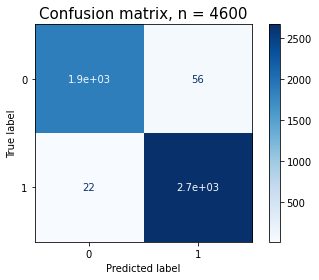

In [ ]:
# 해당 모델의 성능 평가 지표를 분석해보도록 하겠습니다

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe_random, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

In [ ]:
cm = pcm.confusion_matrix
cm

array([[1860,   56],
       [  22, 2662]])

In [ ]:
# 정확하게 맞춘 예측 (TP+TN)

import numpy as np

correct_predictions = np.diag(cm).sum()
correct_predictions

4522

In [ ]:
# 총 예측한 수

total_predictions = cm.sum()
total_predictions

4600

In [ ]:
#분류정확도

correct_predictions/total_predictions

0.9830434782608696

In [ ]:
from sklearn.metrics import classification_report

y_pred = pipe_random.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1916
           1       0.98      0.99      0.99      2684

    accuracy                           0.98      4600
   macro avg       0.98      0.98      0.98      4600
weighted avg       0.98      0.98      0.98      4600



In [ ]:
pipe_random.predict_proba(X_val)

array([[0.97, 0.03],
       [0.99, 0.01],
       [0.85, 0.15],
       ...,
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.  , 1.  ]])

In [ ]:
y_pred_proba = pipe_random.predict_proba(X_val)[:, 1]
y_pred_proba

array([0.03, 0.01, 0.15, ..., 1.  , 0.99, 1.  ])

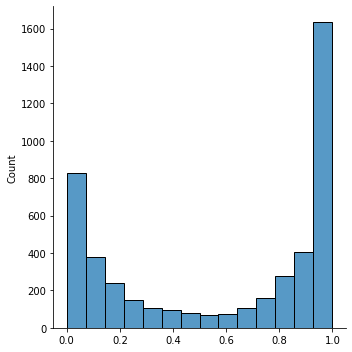

In [ ]:
import seaborn as sns
sns.displot(y_pred_proba);


In [ ]:
from sklearn.metrics import roc_curve

# roc_curve(타겟값, prob of 1)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPRate(Recall)': tpr, 
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPRate(Recall),Threshold
0,0.000000,0.000000,2.00
1,0.000000,0.163189,1.00
2,0.000000,0.283905,0.99
3,0.000000,0.369598,0.98
4,0.000000,0.431073,0.97
...,...,...,...
94,0.731211,1.000000,0.04
95,0.774530,1.000000,0.03
96,0.829854,1.000000,0.02
97,0.901879,1.000000,0.01


In [ ]:
# threshold 최대값의 인덱스, np.argmax()
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('idx:', optimal_idx, ', threshold:', optimal_threshold)

idx: 44 , threshold: 0.56


In [ ]:
y_pred_optimal = y_pred_proba >= optimal_threshold
print(classification_report(y_val, y_pred_optimal))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1916
           1       0.99      0.99      0.99      2684

    accuracy                           0.98      4600
   macro avg       0.98      0.98      0.98      4600
weighted avg       0.98      0.98      0.98      4600



In [ ]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_val, y_pred_proba)
auc_score

0.9989745347827845

# 방법2-1) 특성중요도 파악

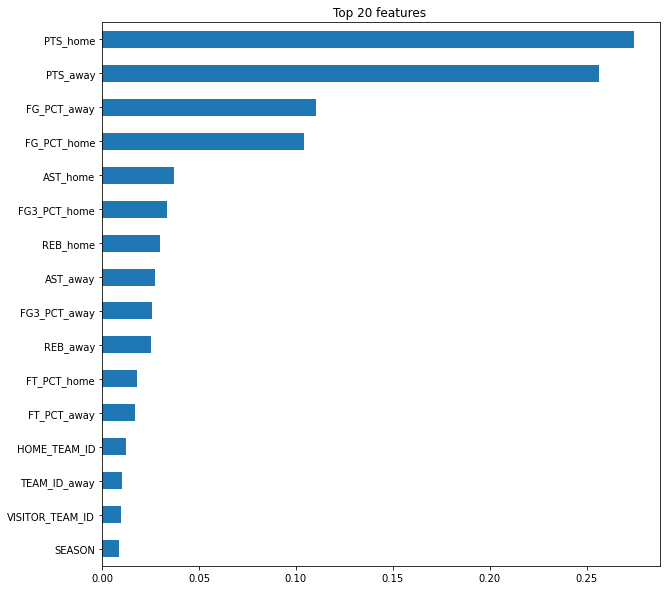

In [ ]:
# 경기결과에 영향을 미치는 가장 큰 요인은 홈에서의 득점

import matplotlib.pyplot as plt

# 특성 중요도()
rf = pipe_random.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features ')
importances.sort_values()[-n:].plot.barh();

# 문제점 발견

### 독립변수와 종속변수와의 당연한 상관관계를 인지하지 못함
### 당연히 득점이 높으면 (PTS_home , PTS_Away) 경기는 승리한다

# 해결책

### 특정 선수 또는 팀을 지정한 뒤 , 직전경기 스탯으로 다음경기 결과를 예측하는 방법으로 선회



---



# 방법1) 선수 지정
### 상대적으로 데이터가 많은 (선수생활을 오래한) 선수로 지정

In [ ]:
#df_details = pd.read_csv('/content/games_details.csv')

FileNotFoundError: ignored

In [ ]:
# 게임 데이터가 가장 많은 'lebron james'로 결정

#df_details['PLAYER_NAME'].value_counts()

In [ ]:
#df_details = df_details[df_details['PLAYER_NAME']=='LeBron James']

In [ ]:
#df_details.info()

In [ ]:
#del df_details['COMMENT']

In [ ]:
#df_details = df_details.dropna()

In [ ]:
#df_details.head(10)

In [ ]:
#df_details= df_details[['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION','START_POSITION', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB', 'AST','STL', 'BLK', 'TO', 'PF', 'PTS']]

In [ ]:
#df = pd.read_csv('/content/games.csv')

In [ ]:
#df= df[['GAME_DATE_EST', 'GAME_ID', 'HOME_TEAM_ID','VISITOR_TEAM_ID', 'HOME_TEAM_WINS']]

In [ ]:
#df_details.head(10)

In [ ]:
#df_home = df[df['PLAYER_NAME']=='LeBron James']

# 방법2) 팀 지정
### 통산 평균 전적이 50%였던 'SAC'(새크라멘토) 팀을 모델링기준으로 선정

In [ ]:
df = pd.read_csv('/content/games.csv')

In [ ]:
df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2020-12-19,12000047,Final,1610612753,1610612766,2020,1610612753,120.0,0.433,0.792,0.425,23.0,50.0,1610612766,117.0,0.444,0.864,0.439,21.0,52.0,1
1,2020-12-19,12000048,Final,1610612764,1610612765,2020,1610612764,99.0,0.427,0.625,0.295,24.0,45.0,1610612765,96.0,0.402,0.647,0.326,18.0,51.0,1
2,2020-12-19,12000049,Final,1610612763,1610612737,2020,1610612763,116.0,0.400,0.744,0.396,21.0,43.0,1610612737,117.0,0.422,0.837,0.297,24.0,47.0,0
3,2020-12-18,12000039,Final,1610612754,1610612755,2020,1610612754,107.0,0.371,0.692,0.262,19.0,45.0,1610612755,113.0,0.533,0.629,0.355,23.0,48.0,0
4,2020-12-18,12000040,Final,1610612761,1610612748,2020,1610612761,105.0,0.380,0.737,0.356,27.0,37.0,1610612748,117.0,0.534,0.741,0.514,30.0,51.0,0


In [ ]:
# 담당팀 SAC , TEAM ID : 1610612758 값만 추출

df = df[df['HOME_TEAM_ID']==1610612758]

In [ ]:
# 시간순으로 배정

df['GAME_DATE_EST'] =pd.to_datetime(df.GAME_DATE_EST)

In [ ]:
df = df.sort_values(by='GAME_DATE_EST')

In [ ]:
df = df.reset_index()

In [ ]:
del df['index']

In [ ]:
df = df.dropna()

In [ ]:
df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2003-10-07,10300009,Final,1610612758,1610612746,2003,1610612758,101.0,0.467,0.871,0.444,19.0,39.0,1610612746,82.0,0.368,0.609,0.364,13.0,50.0,1
4,2003-10-29,20300014,Final,1610612758,1610612739,2003,1610612758,106.0,0.506,0.800,0.222,27.0,41.0,1610612739,92.0,0.465,0.667,0.545,24.0,39.0,1
5,2003-10-31,20300026,Final,1610612758,1610612755,2003,1610612758,100.0,0.514,0.783,0.545,26.0,33.0,1610612755,89.0,0.418,0.767,0.000,16.0,40.0,1
6,2003-11-11,20300100,Final,1610612758,1610612765,2003,1610612758,97.0,0.481,0.680,0.308,29.0,46.0,1610612765,91.0,0.397,0.771,0.286,9.0,47.0,1
7,2003-11-14,20300122,Final,1610612758,1610612761,2003,1610612758,94.0,0.500,0.929,0.385,29.0,48.0,1610612761,64.0,0.338,0.778,0.250,10.0,34.0,1


In [ ]:
# 전 경기 스탯으로 다음 경기의 결과를 예측해야하므로
# 타겟값인 'HOME_TEAM_WINS'을 1행씩 내려서 모델링

In [ ]:
df['PREDICT'] = df.sort_values(by='GAME_DATE_EST', ascending=False).groupby('HOME_TEAM_ID')['HOME_TEAM_WINS'].shift(1)

In [ ]:
df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,PREDICT
0,2003-10-07,10300009,Final,1610612758,1610612746,2003,1610612758,101.0,0.467,0.871,0.444,19.0,39.0,1610612746,82.0,0.368,0.609,0.364,13.0,50.0,1,1.0
4,2003-10-29,20300014,Final,1610612758,1610612739,2003,1610612758,106.0,0.506,0.800,0.222,27.0,41.0,1610612739,92.0,0.465,0.667,0.545,24.0,39.0,1,1.0
5,2003-10-31,20300026,Final,1610612758,1610612755,2003,1610612758,100.0,0.514,0.783,0.545,26.0,33.0,1610612755,89.0,0.418,0.767,0.000,16.0,40.0,1,1.0
6,2003-11-11,20300100,Final,1610612758,1610612765,2003,1610612758,97.0,0.481,0.680,0.308,29.0,46.0,1610612765,91.0,0.397,0.771,0.286,9.0,47.0,1,1.0
7,2003-11-14,20300122,Final,1610612758,1610612761,2003,1610612758,94.0,0.500,0.929,0.385,29.0,48.0,1610612761,64.0,0.338,0.778,0.250,10.0,34.0,1,1.0


In [ ]:
df.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS', 'PREDICT'],
      dtype='object')

In [ ]:
df= df[['GAME_DATE_EST','VISITOR_TEAM_ID', 'SEASON', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away','PREDICT']]

In [ ]:
# AWAY ID 숫자를 약어로 변경
for i in range(0,30):
    df = df.replace(df_team['TEAM_ID'][i],df_team['ABBREVIATION'][i])

In [ ]:
df.head()

,GAME_DATE_EST,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,PREDICT
0,2003-10-07,LAC,2003,101.0,0.467,0.871,0.444,19.0,39.0,LAC,82.0,0.368,0.609,0.364,13.0,50.0,1.0
4,2003-10-29,CLE,2003,106.0,0.506,0.800,0.222,27.0,41.0,CLE,92.0,0.465,0.667,0.545,24.0,39.0,1.0
5,2003-10-31,PHI,2003,100.0,0.514,0.783,0.545,26.0,33.0,PHI,89.0,0.418,0.767,0.000,16.0,40.0,1.0
6,2003-11-11,DET,2003,97.0,0.481,0.680,0.308,29.0,46.0,DET,91.0,0.397,0.771,0.286,9.0,47.0,1.0
7,2003-11-14,TOR,2003,94.0,0.500,0.929,0.385,29.0,48.0,TOR,64.0,0.338,0.778,0.250,10.0,34.0,1.0


In [ ]:
df = pd.read_csv('/content/games.csv')
df1 = df[df['HOME_TEAM_ID']==1610612758]
df1['GAME_DATE_EST'] =pd.to_datetime(df1.GAME_DATE_EST)
df1 = df1.sort_values(by='GAME_DATE_EST')
df1 = df1.reset_index()
del df1['index']
df1 = df1.dropna()
df1['PREDICT'] = df1.sort_values(by='GAME_DATE_EST', ascending=False).groupby('HOME_TEAM_ID')['HOME_TEAM_WINS'].shift(1)
result = df1.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_team['TEAM_ID'].unique()

array([1610612737, 1610612738, 1610612740, 1610612741, 1610612742,
       1610612743, 1610612745, 1610612746, 1610612747, 1610612748,
       1610612749, 1610612750, 1610612751, 1610612752, 1610612753,
       1610612754, 1610612755, 1610612756, 1610612757, 1610612758,
       1610612759, 1610612760, 1610612761, 1610612762, 1610612763,
       1610612764, 1610612765, 1610612766, 1610612739, 1610612744])

In [ ]:
for i in (1610612737, 1610612738, 1610612740, 1610612741, 1610612742,
       1610612743, 1610612745, 1610612746, 1610612747, 1610612748,
       1610612749, 1610612750, 1610612751, 1610612752, 1610612753,
       1610612754, 1610612755, 1610612756, 1610612757,
       1610612759, 1610612760, 1610612761, 1610612762, 1610612763,
       1610612764, 1610612765, 1610612766, 1610612739, 1610612744):
    df = pd.read_csv('/content/games.csv')
    df1 = df[df['HOME_TEAM_ID']== i ]
    df1['GAME_DATE_EST'] =pd.to_datetime(df1.GAME_DATE_EST)
    df1 = df1.sort_values(by='GAME_DATE_EST')
    df1 = df1.reset_index()
    del df1['index']
    df1 = df1.dropna()
    df1['PREDICT'] = df1.sort_values(by='GAME_DATE_EST', ascending=False).groupby('HOME_TEAM_ID')['HOME_TEAM_WINS'].shift(1)
    df1 = df1.dropna()
    result = pd.concat([result,df1],ignore_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [ ]:
result.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,PREDICT
0,2003-10-07,10300009,Final,1610612758,1610612746,2003,1610612758,101.0,0.467,0.871,0.444,19.0,39.0,1610612746,82.0,0.368,0.609,0.364,13.0,50.0,1,1.0
1,2003-10-29,20300014,Final,1610612758,1610612739,2003,1610612758,106.0,0.506,0.800,0.222,27.0,41.0,1610612739,92.0,0.465,0.667,0.545,24.0,39.0,1,1.0
2,2003-10-31,20300026,Final,1610612758,1610612755,2003,1610612758,100.0,0.514,0.783,0.545,26.0,33.0,1610612755,89.0,0.418,0.767,0.000,16.0,40.0,1,1.0
3,2003-11-11,20300100,Final,1610612758,1610612765,2003,1610612758,97.0,0.481,0.680,0.308,29.0,46.0,1610612765,91.0,0.397,0.771,0.286,9.0,47.0,1,1.0
4,2003-11-14,20300122,Final,1610612758,1610612761,2003,1610612758,94.0,0.500,0.929,0.385,29.0,48.0,1610612761,64.0,0.338,0.778,0.250,10.0,34.0,1,1.0


# 다음 데이터로 다시 모델링 진행

In [ ]:
result = result.sort_values(by='GAME_DATE_EST')

In [ ]:
result = result.reset_index()
del result['index']

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23391 entries, 0 to 23390
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   GAME_DATE_EST     23391 non-null  datetime64[ns]
 1   GAME_ID           23391 non-null  int64         
 2   GAME_STATUS_TEXT  23391 non-null  object        
 3   HOME_TEAM_ID      23391 non-null  int64         
 4   VISITOR_TEAM_ID   23391 non-null  int64         
 5   SEASON            23391 non-null  int64         
 6   TEAM_ID_home      23391 non-null  int64         
 7   PTS_home          23391 non-null  float64       
 8   FG_PCT_home       23391 non-null  float64       
 9   FT_PCT_home       23391 non-null  float64       
 10  FG3_PCT_home      23391 non-null  float64       
 11  AST_home          23391 non-null  float64       
 12  REB_home          23391 non-null  float64       
 13  TEAM_ID_away      23391 non-null  int64         
 14  PTS_away          2339

In [ ]:
result= result[['HOME_TEAM_ID','VISITOR_TEAM_ID', 'SEASON', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away','PREDICT']]

In [ ]:
# TEAM ID 숫자를 약어로 변경
for i in range(0,30):
    result = result.replace(df_team['TEAM_ID'][i],df_team['ABBREVIATION'][i])

In [ ]:
# train, val, test 를 6:2:2 나누어줌

test = result[-4600:]
val = result[-9200:-4600]
train = result[:-9200]

# 방법1) 결정트리

In [ ]:
target = 'PREDICT'

In [ ]:
features = train.drop(columns=[target]).columns

In [ ]:
X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

In [ ]:
!pip install category_encoders

In [ ]:
from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

In [ ]:
pipe_tree = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(random_state=2, criterion='entropy')
)

pipe_tree.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['HOME_TEAM_ID', 'VISITOR_TEAM_ID',
                                     'TEAM_ID_away'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='entropy', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                       

In [ ]:
print('훈련 정확도', pipe_tree.score(X_train, y_train))
print('검증 정확도', pipe_tree.score(X_val, y_val))

훈련 정확도 1.0
검증 정확도 0.5239130434782608


In [ ]:
# 복잡도를 낮추어 일반화 유도 (1)

pipe_tree_2 = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(min_samples_leaf=10, random_state=2)
)

pipe_tree_2.fit(X_train, y_train)
print('훈련 정확도', pipe_tree_2.score(X_train, y_train))
print('검증 정확도', pipe_tree_2.score(X_val, y_val))
print('테스트 정확도', pipe_tree_2.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


훈련 정확도 0.7766894510605313
검증 정확도 0.5226086956521739
테스트 정확도 0.513695652173913


In [ ]:
#복잡도를 낮추어 일반화 유도 (2)

pipe_tree_3 = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(max_depth=6, random_state=2)
)

pipe_tree_3.fit(X_train, y_train)
print('훈련 정확도', pipe_tree_3.score(X_train, y_train))
print('검증 정확도', pipe_tree_3.score(X_val, y_val))
print('테스트 정확도', pipe_tree_3.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


훈련 정확도 0.6110210696920584
검증 정확도 0.5782608695652174
테스트 정확도 0.5678260869565217


#방법2) 랜덤포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe_random = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True)
)

pipe_random.fit(X_train, y_train)
print('훈련 정확도', pipe_random.score(X_train, y_train))
print('검증 정확도', pipe_random.score(X_val, y_val))
print('테스트 정확도', pipe_random.score(X_test, y_test))

훈련 정확도 1.0
검증 정확도 0.5610869565217391
테스트 정확도 0.5595652173913044


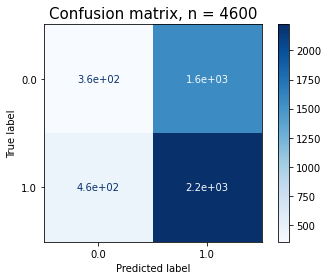

In [ ]:
# 해당 모델의 성능 평가 지표를 분석해보도록 하겠습니다

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe_random, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

In [ ]:
cm = pcm.confusion_matrix
cm

array([[ 358, 1564],
       [ 455, 2223]])

In [ ]:
from sklearn.metrics import classification_report

y_pred = pipe_random.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.44      0.19      0.26      1922
         1.0       0.59      0.83      0.69      2678

    accuracy                           0.56      4600
   macro avg       0.51      0.51      0.47      4600
weighted avg       0.53      0.56      0.51      4600



In [ ]:
pipe_random.predict_proba(X_val)

array([[0.45, 0.55],
       [0.51, 0.49],
       [0.41, 0.59],
       ...,
       [0.38, 0.62],
       [0.4 , 0.6 ],
       [0.38, 0.62]])

In [ ]:
y_pred_proba = pipe_random.predict_proba(X_val)[:, 1]
y_pred_proba

array([0.55, 0.49, 0.59, ..., 0.62, 0.6 , 0.62])

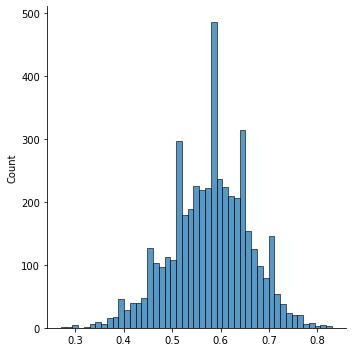

In [ ]:
import seaborn as sns
sns.displot(y_pred_proba);

In [ ]:
from sklearn.metrics import roc_curve

# roc_curve(타겟값, prob of 1)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPRate(Recall)': tpr, 
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPRate(Recall),Threshold
0,0.000000,0.000000,1.83
1,0.000000,0.000747,0.83
2,0.000000,0.001120,0.82
3,0.001041,0.002240,0.81
4,0.001561,0.002987,0.80
5,0.002601,0.005228,0.79
6,0.003122,0.007095,0.78
7,0.005203,0.010082,0.77
8,0.006243,0.012323,0.76
9,0.011446,0.016057,0.75


In [ ]:
import numpy as np

# threshold 최대값의 인덱스, np.argmax()
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('idx:', optimal_idx, ', threshold:', optimal_threshold)

idx: 24 , threshold: 0.6


In [ ]:
y_pred_optimal = y_pred_proba >= optimal_threshold
print(classification_report(y_val, y_pred_optimal))

              precision    recall  f1-score   support

         0.0       0.43      0.59      0.50      1922
         1.0       0.60      0.44      0.51      2678

    accuracy                           0.51      4600
   macro avg       0.52      0.52      0.51      4600
weighted avg       0.53      0.51      0.51      4600



In [ ]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_val, y_pred_proba)
auc_score

0.5211434908403074

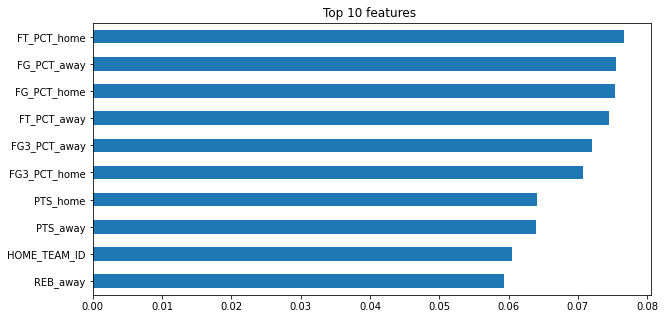

In [ ]:
# 경기결과에 영향을 미치는 가장 큰 요인은 홈에서의 득점

import matplotlib.pyplot as plt

# 특성 중요도()
rf = pipe_random.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

n = 10
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features ')
importances.sort_values()[-n:].plot.barh();